# PCA on MNIST dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
sample_mnist=pd.read_csv("./mnist_train.csv")

In [3]:
# loc is used to drop and create a new data set.
data=sample_mnist.loc[:,sample_mnist.columns.drop(['label'])]

In [4]:
# iloc is used in this manner
label=sample_mnist.iloc[:,[0]].copy()

In [5]:
mnist_label=label.head(15000)
mnist_data=data.head(15000)

In [6]:
print(mnist_data.shape)
print(mnist_label.shape)

(15000, 784)
(15000, 1)


In [7]:
# data preprocessing it makes use of mean and std deviation to make the vakue in between 0 and 1
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(mnist_data)
print(standardized_data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# 2D Visualization using PCA

In [8]:
# copying the standardized data that we got in last step 
sample_data=standardized_data

# now going to form the covariance matrix i.e s = A^t.A 
cov_mat=np.matmul(sample_data.T,sample_data)

# printing the shape of the matrix to check whether we got the multiplication right or not
print(cov_mat.shape)


(784, 784)


In [9]:
# now computing the eigen values and eigen vector for the given covariance matrix

from scipy.linalg import eigh

values,vectors=eigh(cov_mat);

print(values.shape)
print(vectors.shape)

(784,)
(784, 784)


In [10]:
# we need only selected eigen values so that we can make sure we are using the most imp eigen values

val_2,vec_2=eigh(cov_mat,eigvals=(782,783))

print(val_2.shape)
print(vec_2.shape)

(2,)
(784, 2)


In [11]:
# we need to change the shape for the easyness of further computation
# changing the shape from 784,2 to 2,784
vec_2=vec_2.T
print(vec_2.shape)

(2, 784)


In [12]:
# at last we want to create the new data frame where we have the eigen vecgotrs multiplied with the original dataset

new_data=np.matmul(vec_2,sample_data.T)

new_data.shape



(2, 15000)

In [13]:
# we want to plot the points on the graph for that we need the label column also in our dataset so that we can able to 
# categorize the points according to ourselves

new_dataframe=np.vstack((new_data,label.head(15000).T)).T

new_dataframe.shape

# here the resultant dataframe will be an numpy array without the column names hence we 
# need to change the data array into datafrme where we can then use it to plot the points

(15000, 3)

In [14]:
dataframe=pd.DataFrame(data=new_dataframe,columns=("2nd_prin","1st_prin","label"))

print(dataframe.shape)
print(dataframe.columns)

(15000, 3)
Index(['2nd_prin', '1st_prin', 'label'], dtype='object')


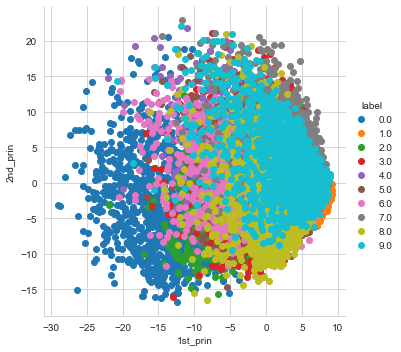

In [15]:
# lets plot the points
sns.set_style("whitegrid")
sns.FacetGrid(dataframe,hue="label",height=5).map(plt.scatter,"1st_prin","2nd_prin").add_legend()
plt.show()

<AxesSubplot:xlabel='1st_prin', ylabel='2nd_prin'>

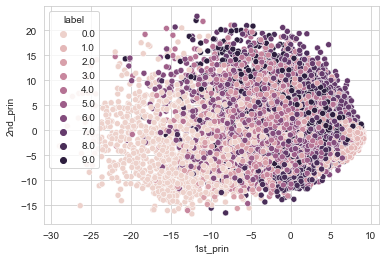

In [16]:
sns.scatterplot(x="1st_prin",y="2nd_prin",legend="full",hue="label",data=dataframe)

# PCA using Scikit-Learn

In [17]:
from sklearn import decomposition

In [18]:
pca = decomposition.PCA()

In [19]:
# in scikit leanr there is a feature where we can select the number of components in which we want our data to be reduced
# which is the same thing that we have done above where we had taken 2 eigen values with the most variance

In [20]:
pca.n_components=2
pca_data=pca.fit_transform(sample_data)

pca_data.shape

(15000, 2)

In [21]:
labels=label.head(15000)
labels.shape

(15000, 1)

In [22]:
pca_newdata=np.vstack((pca_data.T,labels.T)).T

In [23]:
pca_newdata.shape

(15000, 3)

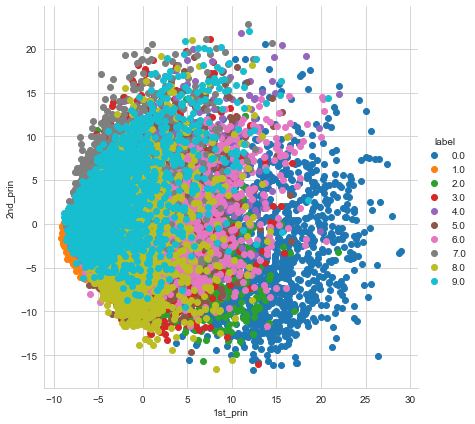

In [24]:
pca_df=pd.DataFrame(data=pca_newdata,columns=("1st_prin","2nd_prin","label"))
sns.FacetGrid(pca_df,hue="label",height=6).map(plt.scatter,'1st_prin','2nd_prin').add_legend()
plt.show()